# ORIE 4580/5580/5581 Assignment 5

#### Student: Dylan Shah (ds2374)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.

Let each bird visit the feeder according to a Poisson process with rate $ \lambda $ (visits per bird per week).

Then: 

Expected tagged visits per week: $ E[T] = 10\lambda $


Expected total visits per week: $ E[V] = N\lambda $

From the observed data:  
$ \bar{T} = 6 $  
$ \bar{V} = 28.8 $

Using the method of moments:  
$ 10\lambda = 6 \Rightarrow \hat{\lambda} = 0.6 $

Substitute into the total-visit equation:  
$ N\lambda = 28.8 \Rightarrow \hat{N} = \frac{28.8}{0.6} = 48 $

Thus, the estimated total hawk population is:  
$ N = 48$

<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.



Let there be $ N $ total hawks in Ithaca, of which $ 10 $ are tagged.  
In the new week, the researcher observes $ n = 20 $ unique birds visiting the feeder, among which $ 4 $ are tagged.

Each bird observed is equally likely to be any of the $ N $ hawks, so the number of tagged birds among the observed $ 20 $ follows the distribution below:

$ P(X = x) = \frac{\binom{10}{x} \binom{N - 10}{20 - x}}{\binom{N}{20}}. $

The likelihood function is 

$ L(N) \propto \frac{\binom{N - 10}{16}}{\binom{N}{20}}, \quad N \ge 20. $

To find the MLE, maximize $ L(N) $ with respect to $ N $.  
Since the likelihood decreases as $ N $ increases, the MLE corresponds to the smallest $ N $ consistent with the data which can be approximated as

$ \frac{10}{N} = \frac{4}{20} \Rightarrow \hat{N} = \frac{10 \times 20}{4} = 50. $

<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.

### Censored Geometric Model for Soup Demand

Let the true daily soup demand be modeled as a geometric random variable

$ P(N = k) = (1 - p)^k p, \quad k \ge 0, $

where $ p $ is the probability that demand stops after $ k $ soups.  
The expected daily demand is  

$ E[N] = \frac{1 - p}{p}. $

However, we only observe the actual sales  

$ Y = \min(N, 40), $

because the Temple of Zeus can make at most $ 40 $ servings per day.  
So, $ Y $ is the censored observation of $ N $.

For $ y < 40 $, we observe the true demand (no censoring):

$ P(Y = y) = P(N = y) = (1 - p)^y p, \quad y = 0, 1, 2, \dots, 39. $

For $ y = 40 $, we observe only that the true demand exceeded 40:

$ P(Y = 40) = P(N \ge 40) = (1 - p)^{40}. $

### Thus, the PMF of $ Y $ is

$ 
P(Y = y) =
\begin{cases}
(1 - p)^y p, & 0 \le y < 40, \\
(1 - p)^{40}, & y = 40 \\
0 & otherwise
\end{cases}
$




<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [2]:
soup = pd.read_csv('Soup_sales_data.csv')
soup.head()

,Day,Y
0,1,40
1,2,3
2,3,33
3,4,24
4,5,28


In [3]:
y = soup['Y']
uncensored = y[y < 40]
censored = y[y == 40]
n1 = len(uncensored)
n2 = len(censored)
S = uncensored.sum()
p_hat = n1 / (n1 + S + 40 * n2)
print('MLE Estimate from Soup Data:', p_hat)

MLE Estimate from Soup Data: 0.02679658952496955


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

Assume each of the $n$ people's birthdays are drawn independently and uniformly from the $365$ days of the year.  

Let $P(\text{no shared birthday})$ denote the probability that all $n$ birthdays are distinct.  
The first person can have any of 365 birthdays, the second person can have any of the remaining 364, the third any of the remaining 363, and so on.

Hence, the probability that no two people share a birthday is:

$$
P(\text{no shared birthday}) = \frac{365 \times 364 \times 363 \times \dots \times (365 - n + 1)}{365^n}
$$

The probability that at least two people share a birthday is therefore:

$$
P(\text{at least one shared birthday}) = 1 - P(\text{no shared birthday})
$$

Thus,

$$
P(\text{at least one shared birthday}) = 1 - \frac{365!}{(365 - n)! \, 365^n}
$$

In [4]:
import math
def birthday_prob(n):
    return 1 - (math.factorial(365) / math.factorial(365 - n)) / (365 ** n)

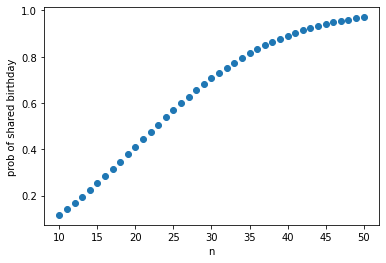

In [5]:
birthday_vec = np.vectorize(birthday_prob)
theo_probs = birthday_vec(np.arange(10, 51))
x = np.arange(10, 51)
plt.scatter(x, theo_probs)
plt.xlabel('n')
plt.ylabel('prob of shared birthday')
plt.show()

<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

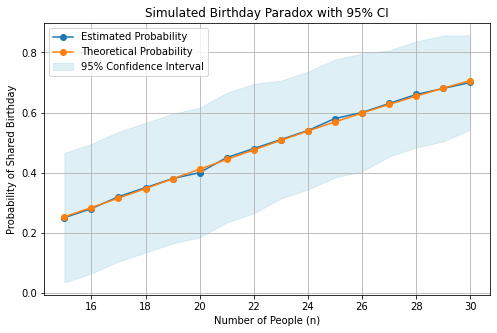

In [6]:
np.random.seed(123)
estimated_probs = np.zeros(16)
num_sims = 10000
z = 1.96
confidence_intervals = np.zeros((16, 2))
for n in range(15, 31):
    trials = np.random.randint(low=1, high=365, size=(num_sims, n))
    has_duplicate = np.apply_along_axis(
    lambda x: len(np.unique(x)) < len(x), axis=1, arr=trials
)
    x_bar = np.mean(has_duplicate).round(2)
    estimated_probs[n - 15] = x_bar
    s2 = np.var(has_duplicate, ddof=1)
    confidence_intervals[n - 15, 0] = x_bar - z * np.sqrt(s2 / n).round(2)
    confidence_intervals[n - 15, 1] = x_bar + z * np.sqrt(s2 / n).round(2)
    
    
estimated_probs
confidence_intervals

n_values = np.arange(15, 31)
    
plt.figure(figsize=(8, 5))
plt.plot(n_values, estimated_probs, 'o-', label='Estimated Probability')
plt.plot(n_values, theo_probs[5:21], 'o-', label='Theoretical Probability')

plt.fill_between(
    n_values,
    confidence_intervals[:, 0],
    confidence_intervals[:, 1],
    color='lightblue',
    alpha=0.4,
    label='95% Confidence Interval'
)

plt.xlabel('Number of People (n)')
plt.ylabel('Probability of Shared Birthday')
plt.title('Simulated Birthday Paradox with 95% CI')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
print('Estimated probabilities for n = 15...30: ', estimated_probs)

Estimated probabilities for n = 15...30:  [0.25 0.28 0.32 0.35 0.38 0.4  0.45 0.48 0.51 0.54 0.58 0.6  0.63 0.66
 0.68 0.7 ]


<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

## Ans.

In [8]:
bdays = pd.read_csv('bdaydata.txt', sep="\s+", names=["date", "count"])
bdays.drop(index=0, inplace = True)
bdays.head()
bdays['count'] = bdays["count"].astype(int)

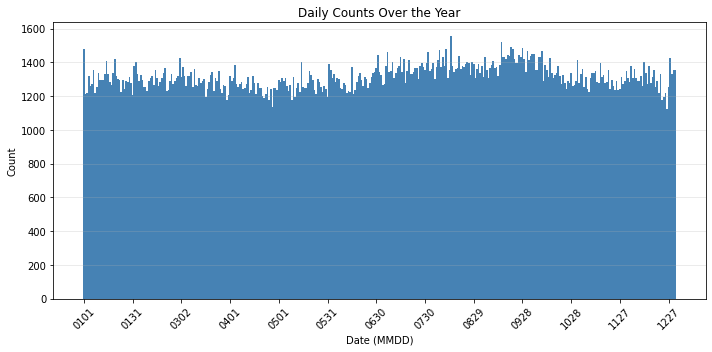

In [9]:
## Plot histogram
plt.figure(figsize=(10, 5))
plt.bar(range(len(bdays)), bdays["count"], color="steelblue", width=1)
plt.xticks(ticks=range(0, len(bdays), 30),
           labels=bdays["date"][::30],
           rotation=45)
plt.title("Daily Counts Over the Year")
plt.xlabel("Date (MMDD)")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

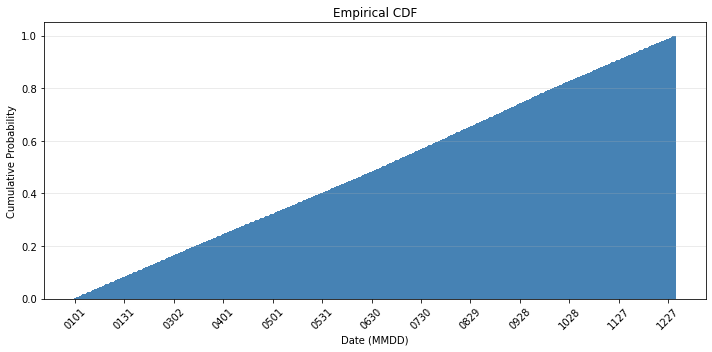

In [10]:
# Empirical CDF
total = bdays['count'].cumsum().iloc[-1]
cumulative_total = bdays['count'].cumsum()
cdf_probs = cumulative_total / total
plt.figure(figsize=(10, 5))
plt.bar(range(len(bdays)), cdf_probs, color="steelblue", width=1)
plt.xticks(ticks=range(0, len(bdays), 30),
           labels=bdays["date"][::30],
           rotation=45)
plt.title("Empirical CDF")
plt.xlabel("Date (MMDD)")
plt.ylabel("Cumulative Probability")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

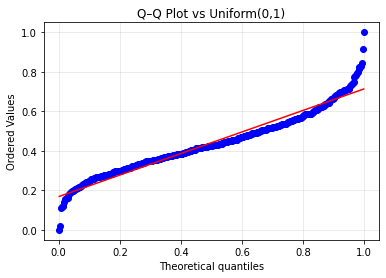

In [11]:
## Q-Q plot

bdays["count"] = pd.to_numeric(bdays["count"], errors="coerce")
x = (bdays["count"] - bdays["count"].min()) / (bdays["count"].max() - bdays["count"].min())
stats.probplot(x, dist="uniform", plot=plt)
plt.title("Q–Q Plot vs Uniform(0,1)")
plt.grid(alpha=0.3)
plt.show()

<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [12]:
## Chi-square test
from scipy.stats import chisquare
obs = bdays["count"].values
exp = np.ones_like(obs) * np.mean(obs)
chi_sq_result = chisquare(obs, exp)
print(chi_sq_result)

Power_divergenceResult(statistic=np.float64(1352.7233599950073), pvalue=np.float64(1.2489373800065057e-113))


According to the Chi-square Test, the daily counts are not uniformly distributed across the 365 days.

In [13]:
## K-S test
from scipy.stats import kstest
X = (bdays["count"] - bdays["count"].min()) / (bdays["count"].max() - bdays["count"].min())
ks_result = kstest(X, "uniform")
print(ks_result)

KstestResult(statistic=np.float64(0.24289917428580465), pvalue=np.float64(1.9179798634489734e-19), statistic_location=np.float64(0.6420323325635104), statistic_sign=np.int8(1))


According to the K-S test, the daily counts are not uniformly distributed across the 365 days.

<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


In [14]:
counts = bdays["count"].values

p_empirical = counts / np.sum(counts)

num_bootstrap = 1000          
n_values = np.arange(15, 31)   
bootstrap_estimates = np.zeros((num_bootstrap, len(n_values)))

for b in range(num_bootstrap):

    resampled_counts = np.random.choice(counts, size=365, replace=True)
    p_star = resampled_counts / np.sum(resampled_counts)

    for j, n in enumerate(n_values):
        trials = 5000  
        sims = np.random.choice(np.arange(365), size=(trials, n), p=p_star)
        has_dup = np.any(np.diff(np.sort(sims, axis=1), axis=1) == 0, axis=1)
        bootstrap_estimates[b, j] = np.mean(has_dup)

mean_est = bootstrap_estimates.mean(axis=0)
ci_lower = np.percentile(bootstrap_estimates, 2.5, axis=0)
ci_upper = np.percentile(bootstrap_estimates, 97.5, axis=0)

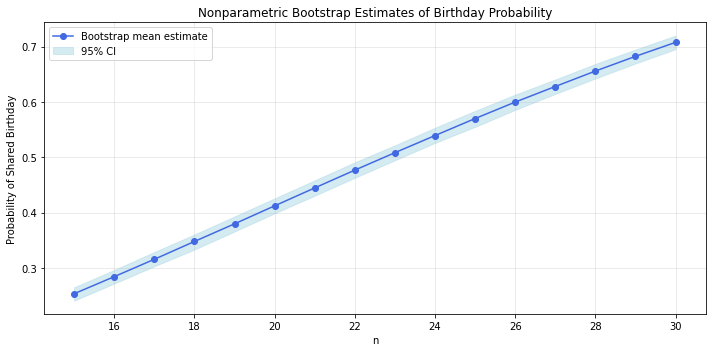

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(n_values, mean_est, 'o-', color='royalblue', label='Bootstrap mean estimate')
plt.fill_between(n_values, ci_lower, ci_upper, color='lightblue', alpha=0.5, label='95% CI')
plt.xlabel("n")
plt.ylabel("Probability of Shared Birthday")
plt.title("Nonparametric Bootstrap Estimates of Birthday Probability")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This plot appears to resemble the plot I created in part (b). However, this plot appears to be more linear. 

<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

In [16]:
from scipy.special import factorial

In [17]:
fact_series = factorial(np.arange(1, 1501),exact=True)
first_digit = np.zeros(1500)
for i in range(1500):
    first_digit[i] = int(str(fact_series[i])[0])

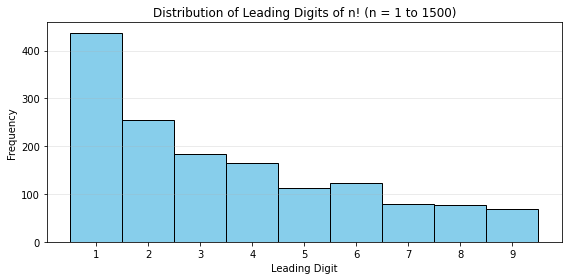

In [18]:
first_digit = np.array([int(str(x)[0]) for x in fact_series])
plt.figure(figsize=(8, 4))
plt.hist(first_digit, bins=np.arange(0.5, 10.5, 1), edgecolor='black', color='skyblue')
plt.xticks(range(1, 10))
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Distribution of Leading Digits of n! (n = 1 to 1500)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [19]:
obs_counts = np.array([np.sum(first_digit == d) for d in range(1, 10)])
n = np.sum(obs_counts)
exp_counts = np.ones(9) * (n / 9)
chi2_result = chisquare(f_obs=obs_counts, f_exp=exp_counts)
print(chi2_result)

Power_divergenceResult(statistic=np.float64(667.5120000000002), pvalue=np.float64(7.04135769230954e-139))


The Chi-square test confirms that the leading digits of factorials strongly deviate from uniformity. 

<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [20]:
obs_counts = np.array([np.sum(first_digit == d) for d in range(1, 10)])
n = np.sum(obs_counts)
p_benford = np.log10(1 + 1 / np.arange(1, 10))
exp_benford = n * p_benford
chi2_benford = chisquare(f_obs=obs_counts, f_exp=exp_benford)
print(chi2_benford)

Power_divergenceResult(statistic=np.float64(9.768287282336871), pvalue=np.float64(0.2816672796372305))


<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

In [21]:
us_pop = pd.read_csv('us_pop.csv')
us_pop.head()

,population,zipcode
0,12,15711
1,111,29437
2,74,26519
3,121,85131
4,19,24318


In [22]:
us_pop['population'] = us_pop['population'].astype(str)
us_pop['first'] = us_pop['population'].apply([lambda x: x[0]])
us_pop.head()

,population,zipcode,first
0,12,15711,1
1,111,29437,1
2,74,26519,7
3,121,85131,1
4,19,24318,1


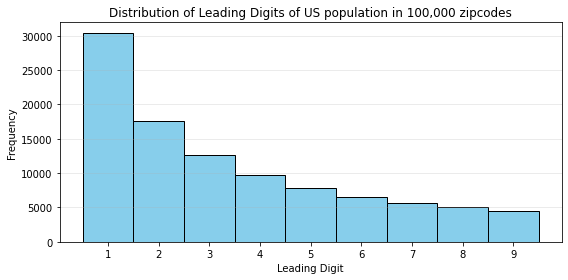

In [23]:
first_digit = us_pop['first'].astype(int)
plt.figure(figsize=(8, 4))
plt.hist(first_digit, bins=np.arange(0.5, 10.5, 1), edgecolor='black', color='skyblue')
plt.xticks(range(1, 10))
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Distribution of Leading Digits of US population in 100,000 zipcodes")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
obs_counts = us_pop['first'].value_counts().reset_index()['count']
n = np.sum(obs_counts)
exp_counts = np.ones(9) * (n / 9)
print(chisquare(f_obs=obs_counts, f_exp=exp_counts))

Power_divergenceResult(statistic=np.float64(50323.53572), pvalue=np.float64(0.0))


In [25]:
p_benford = np.log10(1 + 1 / np.arange(1, 10))
exp_benford = n * p_benford
chi2_benford = chisquare(f_obs=obs_counts, f_exp=exp_benford)
print(chi2_benford)

Power_divergenceResult(statistic=np.float64(11.843226818111061), pvalue=np.float64(0.15833698137848887))


**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.